<a href="https://colab.research.google.com/github/crashidian/CSC525/blob/main/CSC525_CriticalThinking3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the data
data = pd.read_csv('Salary_Data.csv')

In [3]:
# Prepare the features (X) and target (y)
X = data['YearsExperience'].values.reshape(-1, 1)
y = data['Salary'].values

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Create polynomial features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

In [6]:
# Create and train the model
model = LinearRegression()
model.fit(X_poly_train, y_train)

LinearRegression()

In [7]:
# Make predictions
y_pred = model.predict(X_poly_test)

In [8]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 52527916.37
R-squared Score: 0.90


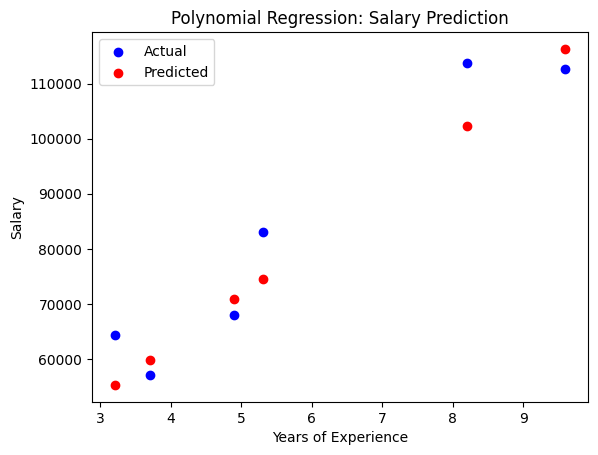

In [9]:
# Visualize the results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Polynomial Regression: Salary Prediction')
plt.legend()
plt.show()

In [10]:
# Function to predict salary for a given years of experience
def predict_salary(years_experience):
    input_data = np.array([[years_experience]])
    input_poly = poly_features.transform(input_data)
    predicted_salary = model.predict(input_poly)[0]
    return predicted_salary

In [11]:
# Example usage
years = 5.5
predicted_salary = predict_salary(years)
print(f"Predicted salary for {years} years of experience: ${predicted_salary:.2f}")

Predicted salary for 5.5 years of experience: $76463.26
